<a href="https://colab.research.google.com/github/kanhaia21/Assignments/blob/main/Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Theoretical

In [3]:
content="""
1. Can we use Bagging for regression problems?
Yes.
•	Bagging can be used for classification & regression.
•	For regression → final prediction = average of predictions from all base models.

2. Difference between multiple model training and single model training?
•	Single model → One algorithm trained on the dataset. Risk of bias/variance.
•	Multiple models (ensemble) → Combine predictions from multiple learners → usually more robust & accurate.

3. Concept of feature randomness in Random Forest.
•	At each split, RF chooses a random subset of features instead of all features.
•	Ensures trees are decorrelated → reduces overfitting & increases diversity.

4. What is OOB (Out-of-Bag) Score?
•	In Bagging, each tree is trained on a bootstrap sample (~63% of data).
•	The remaining (~37%) → Out-of-Bag samples.
•	OOB Score = performance evaluated on these samples (like internal cross-validation).

5. How can you measure feature importance in Random Forest?
1.	Gini importance / Mean Decrease in Impurity (MDI):
o	Measures how much each feature reduces impurity across all splits.
2.	Permutation importance:
o	Randomly shuffle feature values → drop in accuracy shows importance.

6. Working principle of a Bagging Classifier.
1.	Draw bootstrap samples from training data.
2.	Train a base classifier (e.g., decision tree) on each sample.
3.	Aggregate predictions via majority vote (classification).

7. How do you evaluate a Bagging Classifier's performance?
•	Train → use:
o	Accuracy, F1-score, Precision, Recall (classification).
o	OOB score for internal validation.
o	Cross-validation on test set.

8. How does a Bagging Regressor work?
1.	Bootstrap sampling on training data.
2.	Train base regressors (e.g., regression trees).
3.	Aggregate predictions via averaging.

9. Main advantage of ensemble techniques?
•	Better accuracy & generalization than single models.
•	Reduce overfitting (variance) and improve robustness.

10. Main challenge of ensemble methods?
•	High computational cost (time & memory).
•	Harder to interpret (less explainable).
•	May not always outperform a well-tuned single model.

11. Key idea behind ensemble techniques.
•	“Wisdom of the crowd” → combining multiple weak/strong learners produces a better final model.

12. What is a Random Forest Classifier?
•	An ensemble of decision trees built using bagging + feature randomness.
•	Predictions combined via majority vote (classification).

13. Main types of ensemble techniques?
1.	Bagging (Bootstrap Aggregating) → Random Forest.
2.	Boosting → AdaBoost, Gradient Boosting, XGBoost, LightGBM.
3.	Stacking → Combines predictions from multiple different models via a meta-learner.

14. What is ensemble learning in ML?
•	Technique where multiple models are combined to improve predictive performance compared to individual models.

15. When should we avoid using ensemble methods?
•	When interpretability is important (e.g., healthcare decisions).
•	For small datasets → ensembles may overfit & add unnecessary complexity.
•	When computation resources are limited.

16. How does Bagging help in reducing overfitting?
•	By averaging predictions across many bootstrapped models.
•	Reduces variance without increasing bias.

17. Why is Random Forest better than a single Decision Tree?
•	Single tree → high variance, prone to overfitting.
•	RF → combines multiple trees → more stable, better generalization.

18. Role of bootstrap sampling in Bagging?
•	Creates different training subsets from original dataset.
•	Ensures diversity in base models → reduces overfitting.

19. Real-world applications of ensemble techniques:
•	Finance → fraud detection.
•	Healthcare → disease prediction.
•	E-commerce → recommendation engines.
•	Banking → credit risk scoring.
•	Image recognition / NLP → text classification, sentiment analysis.

20. Difference between Bagging and Boosting?
Bagging
Training-Independent (parallel) models
Focus-Reduces variance
Data sampling-Bootstrap samples
Final prediction-Voting/Averaging
Example-Random Forest

Boosting
Training-Sequential models
Focus-Reduces bias-
Data sampling-Reweights misclassified samples
Final prediction-Weighted combination
Example-AdaBoost, Gradient Boosting

"""
print(content)


1. Can we use Bagging for regression problems?
Yes.
•	Bagging can be used for classification & regression.
•	For regression → final prediction = average of predictions from all base models.

2. Difference between multiple model training and single model training?
•	Single model → One algorithm trained on the dataset. Risk of bias/variance.
•	Multiple models (ensemble) → Combine predictions from multiple learners → usually more robust & accurate.

3. Concept of feature randomness in Random Forest.
•	At each split, RF chooses a random subset of features instead of all features.
•	Ensures trees are decorrelated → reduces overfitting & increases diversity.

4. What is OOB (Out-of-Bag) Score?
•	In Bagging, each tree is trained on a bootstrap sample (~63% of data).
•	The remaining (~37%) → Out-of-Bag samples.
•	OOB Score = performance evaluated on these samples (like internal cross-validation).

5. How can you measure feature importance in Random Forest?
1.	Gini importance / Mean Decrease i

#Practical

In [4]:
#21. Bagging Classifier with Decision Trees
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bagging Classifier
bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred))


Bagging Classifier Accuracy: 1.0


In [5]:
#22. Bagging Regressor with Decision Trees (Evaluate MSE)
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
# Dataset
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Bagging Regressor
bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)
print("Bagging Regressor MSE:", mean_squared_error(y_test, y_pred))


Bagging Regressor MSE: 0.2572988359842641


In [6]:
#23. Random Forest Classifier on Breast Cancer Dataset (Feature Importance)
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Feature importance
importance = pd.Series(rf_clf.feature_importances_, index=data.feature_names).sort_values(ascending=False)
print("Feature Importance Scores:\n", importance)


Feature Importance Scores:
 worst area                 0.153892
worst concave points       0.144663
mean concave points        0.106210
worst radius               0.077987
mean concavity             0.068001
worst perimeter            0.067115
mean perimeter             0.053270
mean radius                0.048703
mean area                  0.047555
worst concavity            0.031802
area error                 0.022407
worst texture              0.021749
worst compactness          0.020266
radius error               0.020139
mean compactness           0.013944
mean texture               0.013591
perimeter error            0.011303
worst smoothness           0.010644
worst symmetry             0.010120
concavity error            0.009386
mean smoothness            0.007285
fractal dimension error    0.005321
compactness error          0.005253
worst fractal dimension    0.005210
texture error              0.004724
smoothness error           0.004271
symmetry error             0.004018


In [7]:
#24. Random Forest Regressor vs Single Decision Tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Single Decision Tree
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
print("RF MSE:", mean_squared_error(y_test, y_pred_rf))
print("DT MSE:", mean_squared_error(y_test, y_pred_dt))


RF MSE: 0.03276140350877193
DT MSE: 0.05263157894736842


In [8]:
#25. Compute OOB Score for Random Forest
rf_clf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_clf_oob.fit(X_train, y_train)
print("OOB Score:", rf_clf_oob.oob_score_)


OOB Score: 0.9560439560439561


In [10]:
#26. Bagging Classifier using SVM
from sklearn.svm import SVC
bag_svm = BaggingClassifier(estimator=SVC(probability=True), n_estimators=10, random_state=42)
bag_svm.fit(X_train, y_train)
y_pred = bag_svm.predict(X_test)
print("Bagging SVM Accuracy:", accuracy_score(y_test, y_pred))


Bagging SVM Accuracy: 0.9473684210526315


In [11]:
#27. Random Forest with Different Numbers of Trees
for n in [10, 50, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(f"n_estimators={n}, Accuracy={accuracy_score(y_test, y_pred):.4f}")


n_estimators=10, Accuracy=0.9561
n_estimators=50, Accuracy=0.9649
n_estimators=100, Accuracy=0.9649
n_estimators=200, Accuracy=0.9649


In [12]:
#28. Bagging with Logistic Regression (Print AUC)
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline: scaling + Logistic Regression
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, solver='lbfgs')  # ensures convergence
)

# Bagging Classifier using pipeline as base estimator
bag_lr = BaggingClassifier(
    estimator=pipeline,
    n_estimators=10,
    random_state=42
)
# Train the model
bag_lr.fit(X_train, y_train)

# Predict probabilities
y_prob = bag_lr.predict_proba(X_test)[:, 1]
# Compute AUC
auc_score = roc_auc_score(y_test, y_prob)
print("Bagging Logistic Regression AUC:", auc_score)


Bagging Logistic Regression AUC: 0.9963969865705864


In [13]:
#29. Random Forest Regressor Feature Importance
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

importance = pd.Series(rf_reg.feature_importances_, index=data.feature_names).sort_values(ascending=False)
print("Random Forest Regressor Feature Importance:\n", importance)


Random Forest Regressor Feature Importance:
 worst concave points       0.269936
mean concave points        0.202781
worst perimeter            0.158947
worst area                 0.118171
worst radius               0.103470
worst texture              0.025475
mean texture               0.021067
worst concavity            0.011771
area error                 0.010239
worst smoothness           0.008456
mean smoothness            0.006652
concavity error            0.006587
fractal dimension error    0.005278
mean area                  0.005143
mean concavity             0.004656
worst symmetry             0.004215
perimeter error            0.003913
texture error              0.003764
radius error               0.003696
symmetry error             0.003541
smoothness error           0.003475
concave points error       0.003262
mean symmetry              0.002668
mean perimeter             0.002537
worst fractal dimension    0.002431
mean fractal dimension     0.002150
worst compactness  

In [14]:
#30. Ensemble model using Bagging + Random Forest (Compare Accuracy)
# Bagging Classifier
bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bag_clf.fit(X_train, y_train)
acc_bag = accuracy_score(y_test, bag_clf.predict(X_test))

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
acc_rf = accuracy_score(y_test, rf_clf.predict(X_test))

print(f"Bagging Accuracy: {acc_bag:.4f}")
print(f"Random Forest Accuracy: {acc_rf:.4f}")


Bagging Accuracy: 0.9561
Random Forest Accuracy: 0.9649


In [15]:
#31. Random Forest Classifier + GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

# Load data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
y_pred = grid_search.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 0.9649122807017544


In [16]:
#32. Bagging Regressor with different numbers of base estimators
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for n in [5, 10, 50, 100]:
    bag = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n, random_state=42)
    bag.fit(X_train, y_train)
    y_pred = bag.predict(X_test)
    print(f"n_estimators={n}, MSE={mean_squared_error(y_test, y_pred):.4f}")


n_estimators=5, MSE=0.3060
n_estimators=10, MSE=0.2824
n_estimators=50, MSE=0.2573
n_estimators=100, MSE=0.2559


In [17]:
#33. Random Forest Classifier + analyze misclassified samples
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load classification dataset
X, y = load_breast_cancer(return_X_y=True)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Identify misclassified samples
misclassified_idx = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true != pred]
print("Number of Misclassified Samples:", len(misclassified_idx))
print("Indices of first 10 misclassified samples:", misclassified_idx[:10])

# Optional: analyze the features of misclassified samples
import pandas as pd
feature_names = load_breast_cancer().feature_names
misclassified_samples = pd.DataFrame(X_test[misclassified_idx], columns=feature_names)
print("\nFeatures of first 5 misclassified samples:\n", misclassified_samples.head())


Test Accuracy: 0.9649122807017544
Number of Misclassified Samples: 4
Indices of first 10 misclassified samples: [8, 20, 77, 82]

Features of first 5 misclassified samples:
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.34         15.86           86.49      520.0          0.10780   
1        13.80         15.79           90.43      584.1          0.10070   
2        13.96         17.05           91.43      602.4          0.10960   
3        14.48         21.46           94.25      648.2          0.09444   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.15350         0.11690              0.06987         0.1942   
1           0.12800         0.07789              0.05069         0.1662   
2           0.12790         0.09789              0.05246         0.1908   
3           0.09947         0.12040              0.04938         0.2075   

   mean fractal dimension  ...  worst radius  worst texture  worst per

In [18]:
#34. Bagging Classifier vs Single Decision Tree
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Single Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Bagging Classifier
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bag))


Decision Tree Accuracy: 0.9473684210526315
Bagging Accuracy: 0.956140350877193


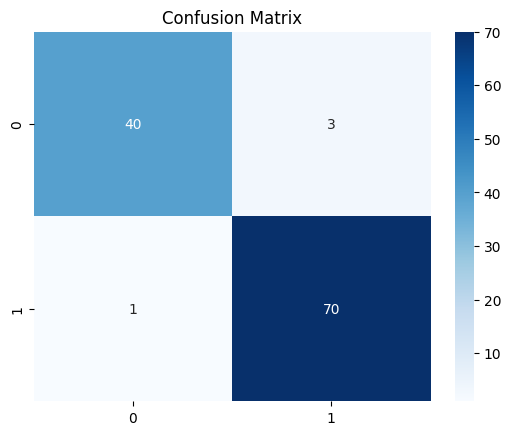

In [19]:
#35. Random Forest + Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [20]:
#36. Stacking Classifier (Decision Tree, SVM, Logistic Regression)
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

estimators = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),
    ('lr', LogisticRegression(max_iter=5000))
]

stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
print("Stacking Accuracy:", accuracy_score(y_test, y_pred))


Stacking Accuracy: 0.956140350877193


In [21]:
#37. Random Forest: Top 5 Important Features
import pandas as pd

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importance = pd.Series(rf.feature_importances_, index=load_breast_cancer().feature_names)
top5 = importance.sort_values(ascending=False).head(5)
print("Top 5 Features:\n", top5)


Top 5 Features:
 worst area              0.153892
worst concave points    0.144663
mean concave points     0.106210
worst radius            0.077987
mean concavity          0.068001
dtype: float64


In [22]:
#38. Bagging Classifier: Precision, Recall, F1-score
from sklearn.metrics import precision_score, recall_score, f1_score

bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))


Precision: 0.9583333333333334
Recall: 0.971830985915493
F1-score: 0.965034965034965


In [23]:
#39. Random Forest: Effect of max_depth
for depth in [None, 3, 5, 10]:
    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(f"max_depth={depth}, Accuracy={accuracy_score(y_test, y_pred):.4f}")


max_depth=None, Accuracy=0.9649
max_depth=3, Accuracy=0.9649
max_depth=5, Accuracy=0.9649
max_depth=10, Accuracy=0.9649


In [24]:
#40. Bagging Regressor: Different Base Estimators
from sklearn.neighbors import KNeighborsRegressor

estimators = [DecisionTreeRegressor(), KNeighborsRegressor()]
for est in estimators:
    bag = BaggingRegressor(estimator=est, n_estimators=50, random_state=42)
    bag.fit(X_train, y_train)
    y_pred = bag.predict(X_test)
    print(f"{est.__class__.__name__} Base MSE: {mean_squared_error(y_test, y_pred):.4f}")


DecisionTreeRegressor Base MSE: 0.0336
KNeighborsRegressor Base MSE: 0.0291


In [25]:
#41. Random Forest Classifier: ROC-AUC
from sklearn.metrics import roc_auc_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_prob = rf.predict_proba(X_test)[:,1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


ROC-AUC Score: 0.9952505732066819


In [26]:
#42. Bagging Classifier: Cross-validation
from sklearn.model_selection import cross_val_score

bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
scores = cross_val_score(bag, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean CV Accuracy:", scores.mean())


Cross-validation scores: [0.9122807  0.92105263 0.98245614 0.95614035 1.        ]
Mean CV Accuracy: 0.9543859649122808


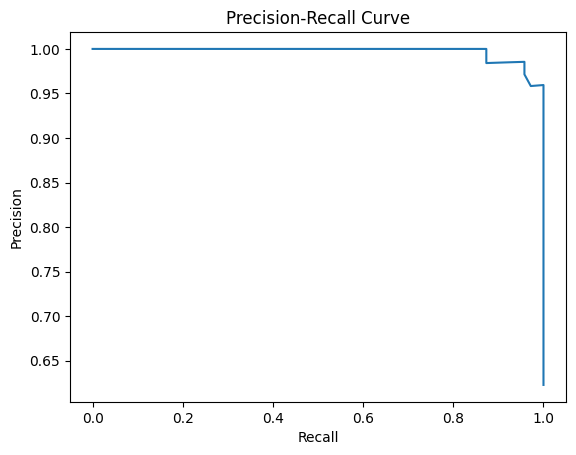

In [27]:
#43. Random Forest: Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_prob = rf.predict_proba(X_test)[:,1]

precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [28]:
#44. Stacking Classifier: Random Forest + Logistic Regression
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('lr', LogisticRegression(max_iter=5000))
]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
print("Stacking Accuracy:", accuracy_score(y_test, y_pred))


Stacking Accuracy: 0.9649122807017544


In [29]:
#45. Bagging Regressor: Different bootstrap levels
for bootstrap in [True, False]:
    bag = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, bootstrap=bootstrap, random_state=42)
    bag.fit(X_train, y_train)
    y_pred = bag.predict(X_test)
    print(f"Bootstrap={bootstrap}, MSE={mean_squared_error(y_test, y_pred):.4f}")


Bootstrap=True, MSE=0.0336
Bootstrap=False, MSE=0.0562
